In [241]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from  statsmodels.tsa.api  import ExponentialSmoothing  , SimpleExpSmoothing  , Holt

import  warnings 
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('gold_monthly_csv.csv')
df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [3]:
df.shape


(847, 2)

In [5]:
df.isnull().sum()


Date     0
Price    0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [11]:
round(df.describe() , 2)


,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


In [102]:
df['month'] = df['Date']

In [103]:
df2 = df
df2 = df2.drop('month' , axis = 1)

In [104]:
df

,Date,Price,month
0,1950-01,34.730,1950-01
1,1950-02,34.730,1950-02
2,1950-03,34.730,1950-03
3,1950-04,34.730,1950-04
4,1950-05,34.730,1950-05
...,...,...,...
842,2020-03,1593.764,2020-03
843,2020-04,1680.030,2020-04
844,2020-05,1715.697,2020-05
845,2020-06,1734.032,2020-06


In [73]:
df = df.set_index('Date')


In [62]:
d = df.set_index('year')

KeyError: "None of ['year'] are in the columns"

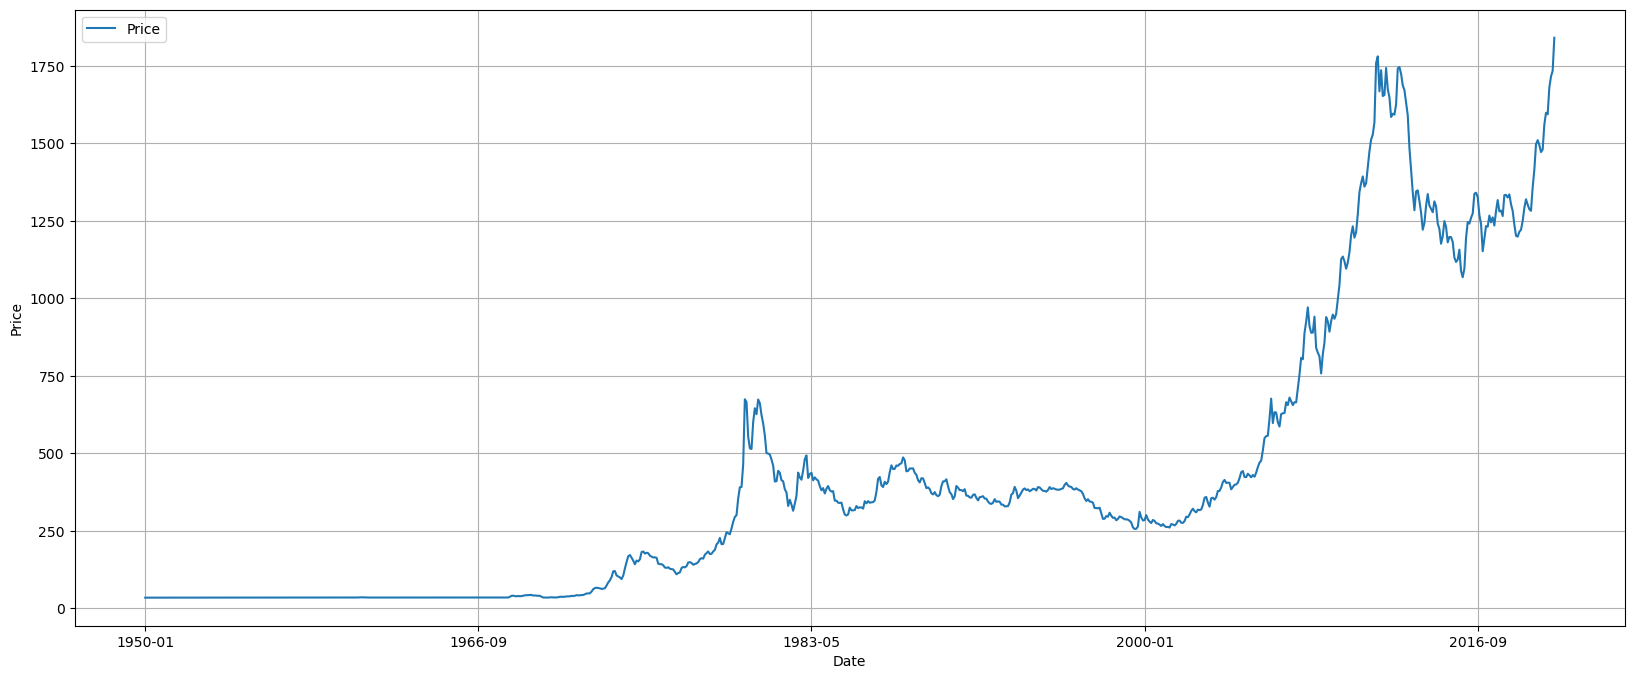

In [75]:
df.plot(figsize =( 20 , 8))
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

In [122]:
df2.index = pd.to_datetime(df2.index)
year_index = df2.index.to_period('Y')

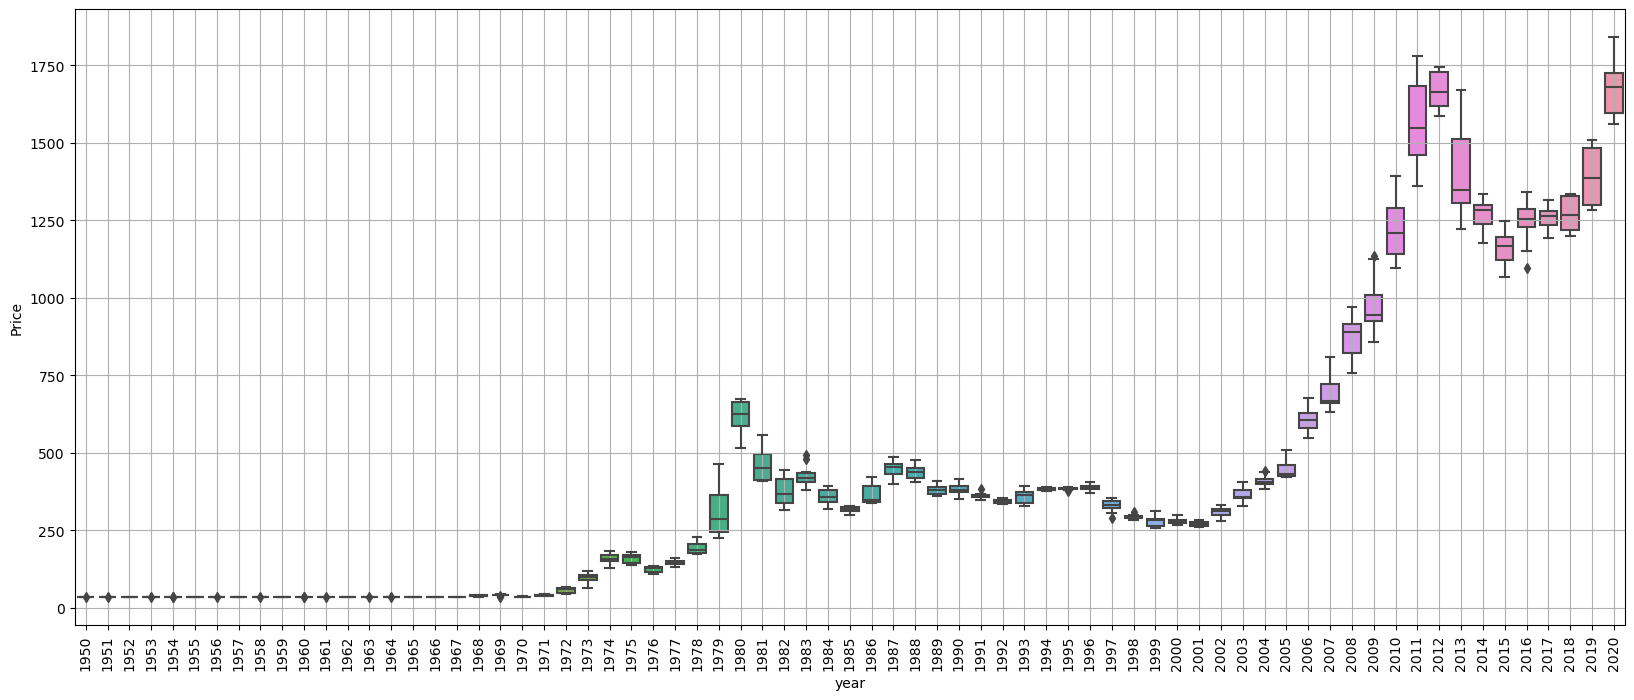

In [123]:
_, ax = plt.subplots(figsize =( 20 , 8))
sns.boxplot(x = year_index , y = df2.values[:,0] , ax = ax)
plt.xlabel("year")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()

In [82]:
from statsmodels.graphics.tsaplots  import month_plot

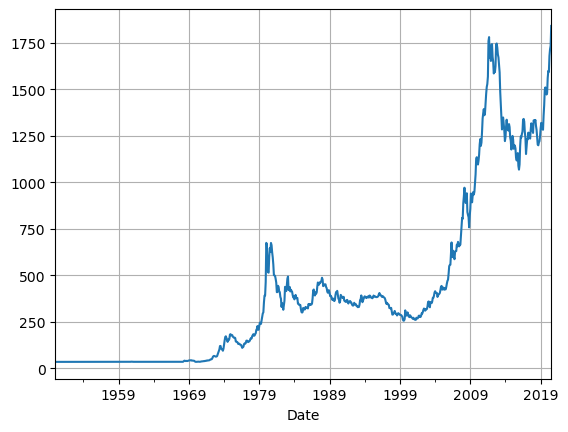

In [126]:
df2_yearly_mean  = df2.Price.resample('m').mean()
df2_yearly_mean.plot();
plt.grid()

In [105]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date') 


In [144]:
df_3  =  df2.merge(df2.groupby(df2.index.year).std().rename(columns = {'price':'std'}) ,left_index = True  , right_index = True  )

In [164]:
train  = df2[df2.index.year  <= 2015]
test = df2[df2.index.year  > 2015 ]

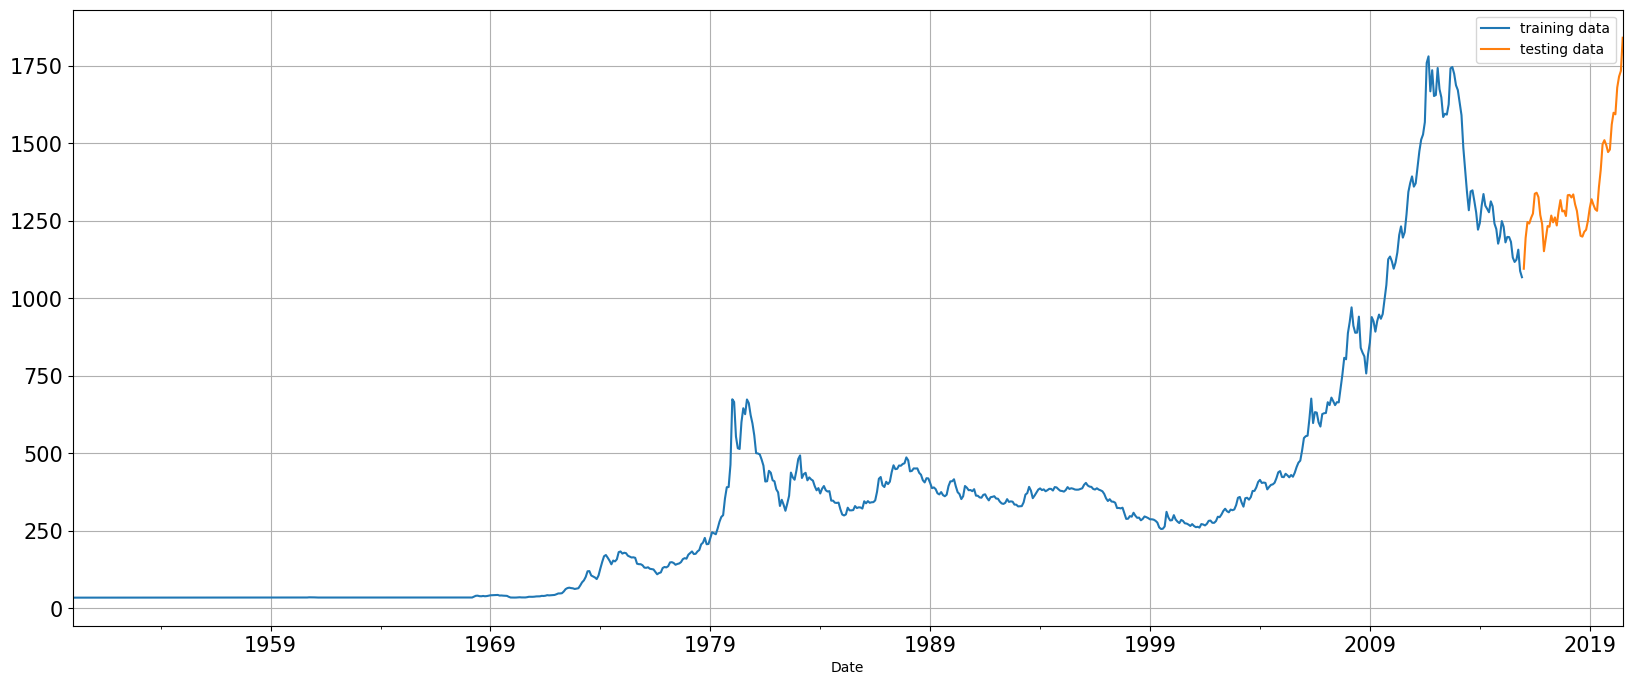

In [177]:
train['Price'].plot(figsize = (20 , 8)  , fontsize = 15) 
test['Price'].plot(figsize = (20 , 8)  , fontsize = 15) 
plt.legend(['training data' , 'testing data'])
plt.grid()

In [178]:
LR_train = train.copy() 
LR_test = test.copy()

In [223]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train)+1 for i in range(len(test))]

In [225]:
LR_train['time'] = train_time
LR_test['time'] = test_time


In [226]:
lr = LinearRegression()
model = lr.fit(LR_train[['time']] , LR_train[['Price']])

In [227]:
lr.fit(LR_train[['time']] , LR_train[['Price']])
print(model.intercept_)
print(model.coef_)

[-190.76738566]
[[1.36983411]]


In [228]:
train_predictions_model = lr.predict(LR_train[["time"]])
LR_train['forecast'] = train_predictions_model

In [230]:
LR_test

,Price,time,forecast
Date,,,
2016-01-01,1095.655,793,-189.397552
2016-02-01,1194.893,794,-188.027717
2016-03-01,1246.312,795,-186.657883
2016-04-01,1241.452,796,-185.288049
2016-05-01,1259.755,797,-183.918215
2016-06-01,1273.580,798,-182.548381
2016-07-01,1337.429,799,-181.178547
2016-08-01,1340.861,800,-179.808713
2016-09-01,1326.618,801,-178.438879


In [231]:
test_predictions_model = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model

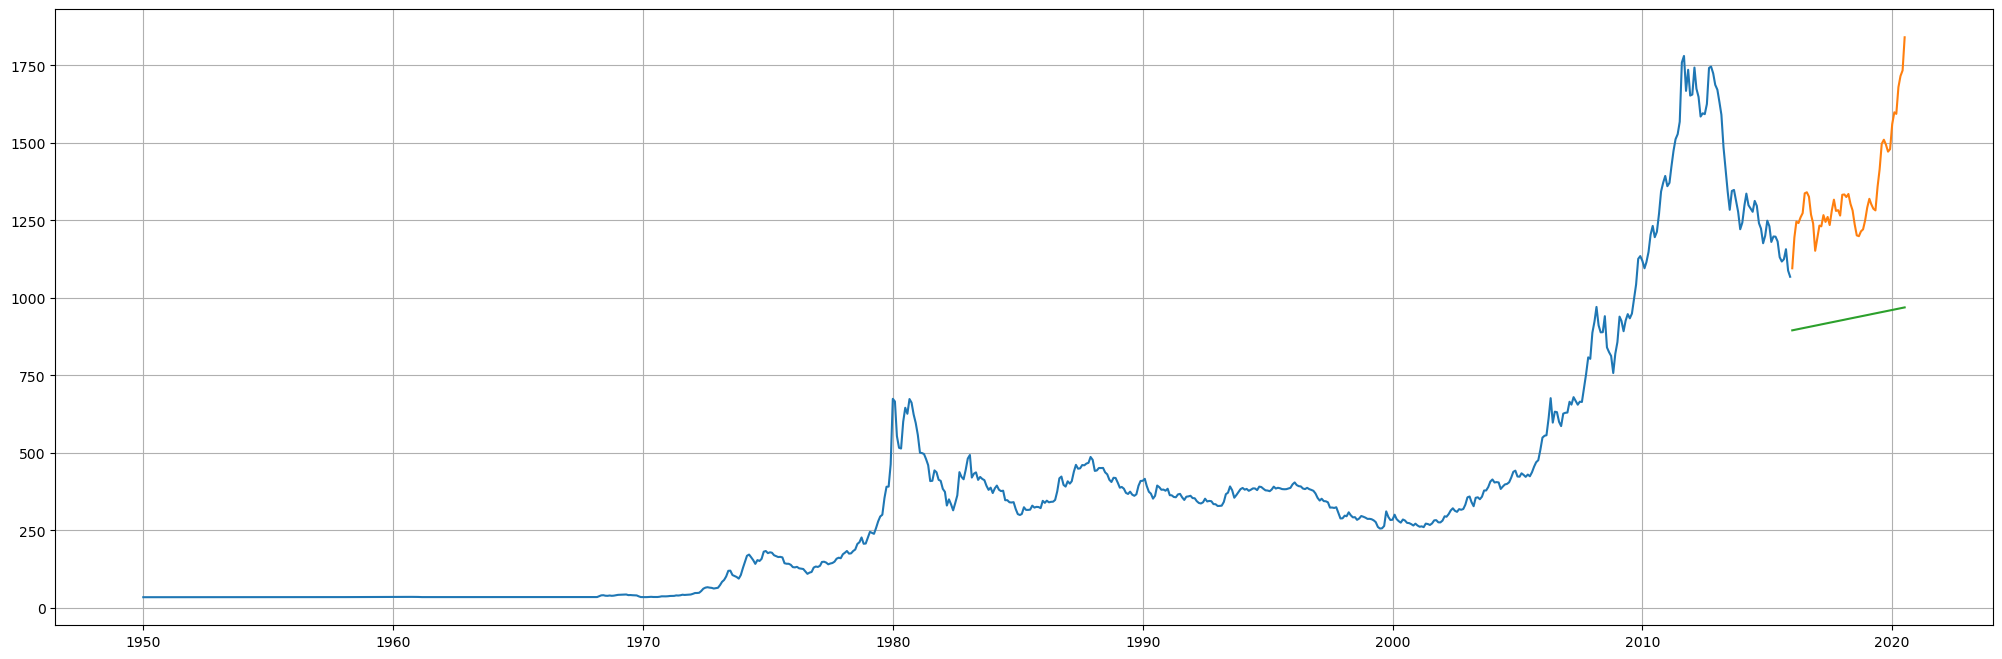

In [232]:
plt.figure(figsize = (25 , 8))
plt.plot(train['Price'])
plt.plot(test['Price'])
plt.plot(LR_test['forecast'])
plt.grid()

In [234]:
mape_final_model  = mape(df2['Price'].values  , final_model.fittedvalues)

NameError: name 'mape' is not defined

In [237]:
final_model  = ExponentialSmoothing(df2 , 
                                 trend = "additive" , 
                                 seasonal  = "additive").fit(smoothing_level = 0.4 ,
                                                              smoothing_trend = 0.3 , 
                                                              smoothing_seasonal = 0.6 
                                                             )

In [238]:
predictions  = final_model.forecast(steps  = len(test)) 

In [244]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof = 1 ) ,
                        'predictions' : predictions  , 
                        'Upper_CI':  predictions + 1.96*np.std(final_model.resid,ddof = 1 )
                         })
                                                             
                                                             
                                                             

In [245]:
pred_df

,lower_CI,predictions,Upper_CI
2020-08-01,1684.718274,1792.869246,1901.020219
2020-09-01,1615.301815,1723.452788,1831.603760
2020-10-01,1538.560879,1646.711851,1754.862823
2020-11-01,1476.748832,1584.899804,1693.050776
2020-12-01,1459.315210,1567.466182,1675.617154
2021-01-01,1514.403893,1622.554865,1730.705837
2021-02-01,1545.337867,1653.488839,1761.639811
2021-03-01,1556.749789,1664.900761,1773.051733
2021-04-01,1648.295729,1756.446701,1864.597673
2021-05-01,1694.212521,1802.363493,1910.514465


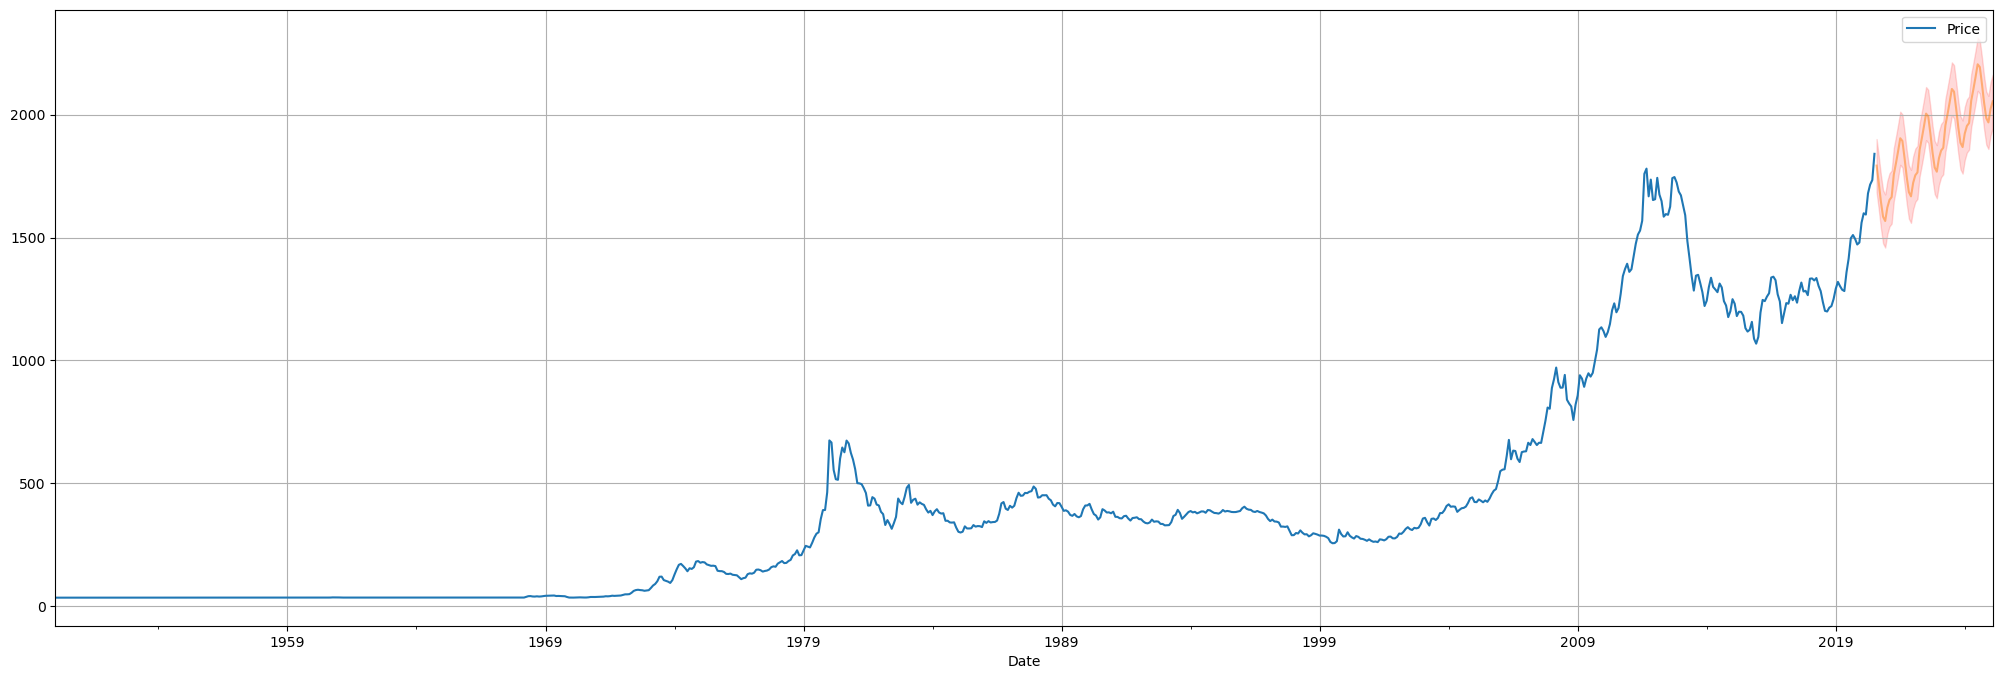

In [259]:
axis = df2.plot(label = 'Actual' , figsize = (25,8))

pred_df['predictions'].plot (ax = axis , label = 'forecast' , alpha = 0.5 )
axis.fill_between(pred_df.index , pred_df['lower_CI']  , pred_df['Upper_CI']  , color = "Red"  , alpha = 0.15)
plt.grid()

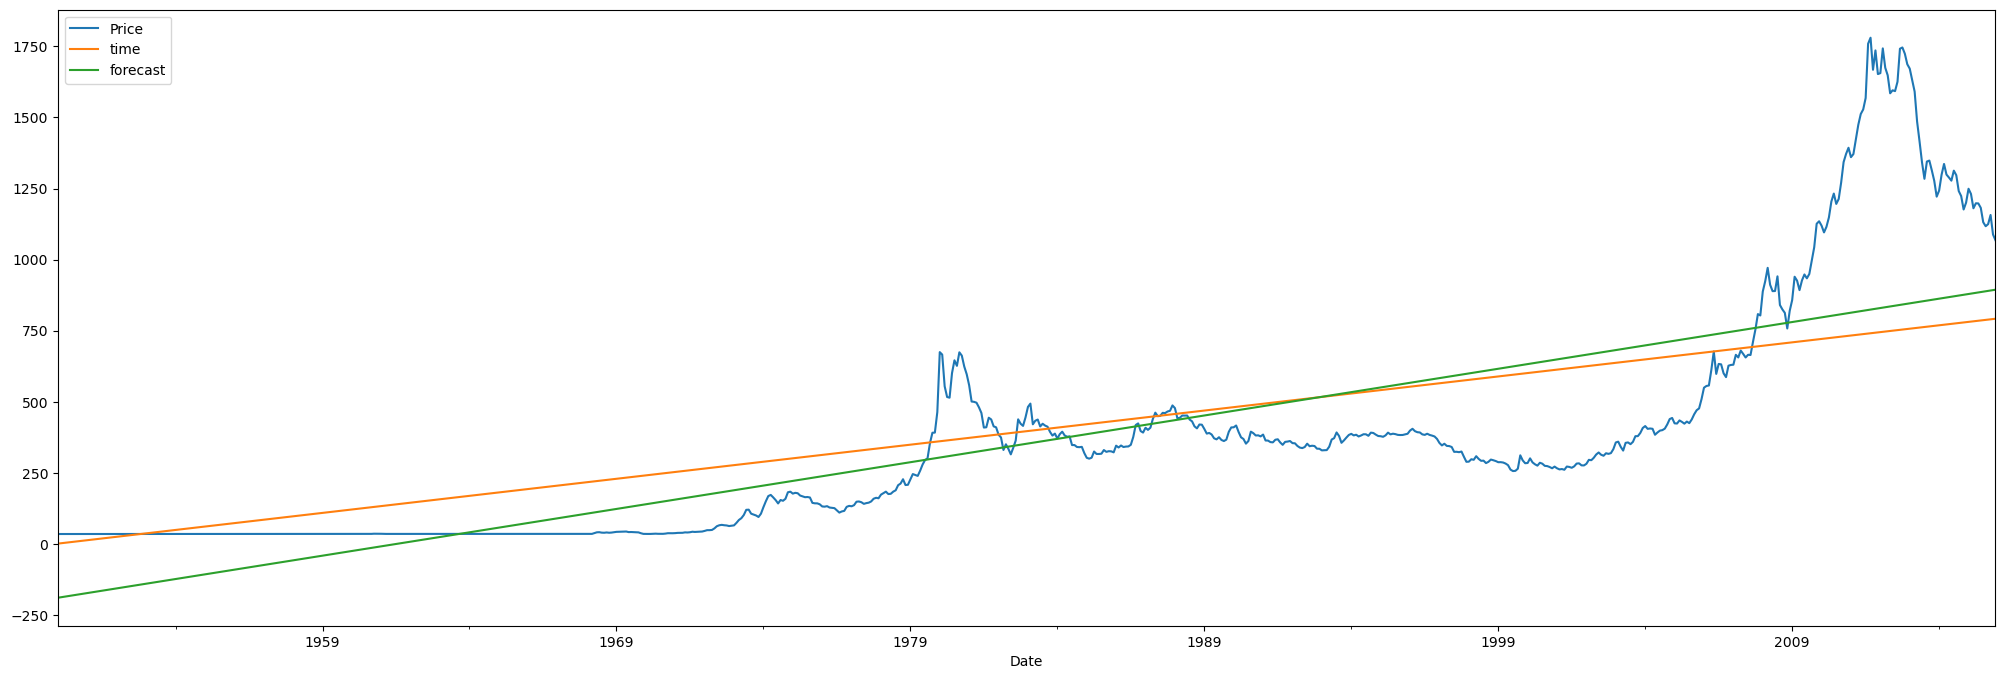

In [255]:
axis = LR_train.plot(label = 'Actual' , figsize = (25,8))


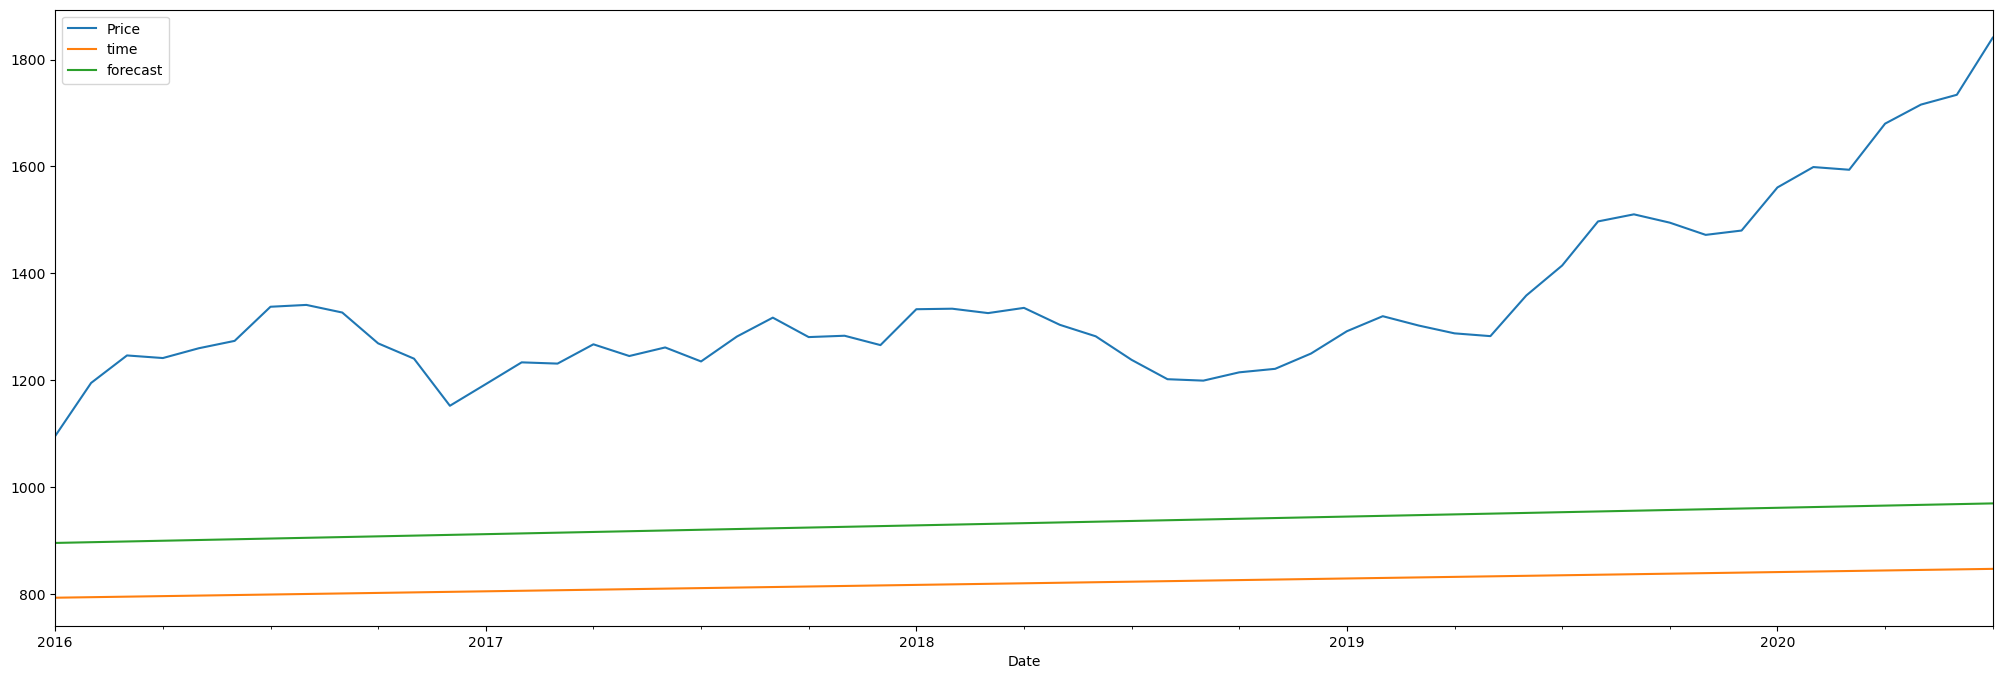

In [260]:
axis = LR_test.plot(label = 'Actual' , figsize = (25,8))


# Accuracy of model 

In [261]:
def mape(actual  , pred ):
    return  round((np.mean(abs(actual-pred) / actual))*100 , 2 )

In [262]:
mape_model = mape(test['Price'].values ,test_predictions_model )

In [266]:
print("Mape is " , mape_model , "%" )

Mape is  29.63 %
